# FStrings

Esta tabla contiene la información adicional de las sentencias de tipo JoinedStr (Strings formateados).

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = get_data('fstrings')

# Table name, features and target.
TABLE_NAME = 'fstrings'
TABLE_FEATURES = ['fstring__number_of_elements', 'fstring__constants_pct', 'fstring__expressions_pct', 'fstring__expertise_level']
TABLE_TARGET = 'fstring__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2025-01-17 11:27:23.958006 Loading data ...
2025-01-17 11:27:24.808230 Data successfully load!!
2025-01-17 11:27:24.808230 Creating data cache files ...
2025-01-17 11:27:24.808230 Data cache files successfully created!!
Features shape: (9245, 4)
Target shape: (9245,)
As we can see the downloaded data contains a total of 9245 instances. For each instance we have 4 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9245 entries, 0 to 9244
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fstring__number_of_elements  9245 non-null   int64  
 1   fstring__constants_pct       9245 non-null   float64
 2   fstring__expressions_pct     9245 non-null   float64
 3   fstring__expertise_level     9245 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 289.0+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 9245 entries, 0 to 9244
Series name: fstring__expertise_level
Non-Null Count  Dtype 
--------------  ----- 
9245 non-null   object
dtypes: object(1)
memory usage: 72.4+ KB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 1 de tipo objeto.

### 2.1 - Equilibrado de clases

In [25]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for PROFESSIONAL class.")

The dataset contains 33.73% instances for BEGINNER class and 66.27% for PROFESSIONAL class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

fstring__number_of_elements    0
fstring__constants_pct         0
fstring__expressions_pct       0
fstring__expertise_level       0
dtype: int64

In [5]:
print_empty_cols(X)

fstring__number_of_elements
---------------------------
0 instancias no tienen un valor para la columna fstring__number_of_elements


fstring__constants_pct
----------------------
0 instancias no tienen un valor para la columna fstring__constants_pct


fstring__expressions_pct
------------------------
0 instancias no tienen un valor para la columna fstring__expressions_pct


fstring__expertise_level
------------------------
0 instancias no tienen un valor para la columna fstring__expertise_level




### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fstring__number_of_elements,9245.0,NaN,NaN,NaN,3.206814,2.034019,1.0,2.0,3.0,4.0,43.0
fstring__constants_pct,9245.0,NaN,NaN,NaN,0.558209,0.163099,0.0,0.5,0.5,0.666667,1.0
fstring__expressions_pct,9245.0,NaN,NaN,NaN,0.441791,0.163099,0.0,0.333333,0.5,0.5,1.0
fstring__expertise_level,9245,2,PROFESSIONAL,6127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "fstring__number_of_elements": [(0.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 0.0 max:44.0
    "fstring__constants_pct": [(0.0, 0.5), (0.5, 0.5), (0.5, 0.67), (0.67, inf)],  # min: 0.0 max: 1.0
    "fstring__expressions_pct": [(0.0, 0.33), (0.33, 0.5), (0.5, 0.5), (0.5, inf)],  # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['fstring__number_of_elements'], 10))
print(get_statistics(X_copy, ['fstring__constants_pct'], 10))
print(get_statistics(X_copy, ['fstring__expressions_pct'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
fstring__number_of_elements  count  percentage
                  [2.0_3.0)   3410   36.884803
                  [4.0_inf]   2644   28.599243
                  [3.0_4.0)   2451   26.511628
                  [0.0_2.0)    740    8.004327

fstring__constants_pct  count  percentage
             [0.5_0.5]   4835   52.298540
            [0.5_0.67)   3137   33.931855
             [0.0_0.5)    708    7.658194
            [0.67_inf]    565    6.111412

fstring__expressions_pct  count  percentage
               [0.5_0.5]   4835   52.298540
              [0.33_0.5)   3137   33.931855
               [0.5_inf]    708    7.658194
              [0.0_0.33)    565    6.111412

--- TWO FEATURES ---
--- THREE FEATURES ---


In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (9245, 5)
Target shape: (9245,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

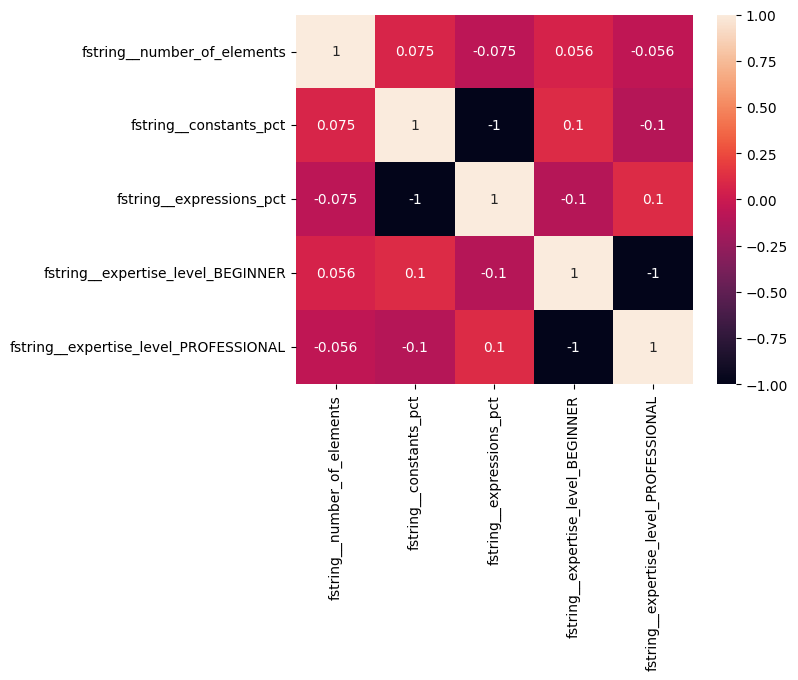

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 3 variables (1 numerica y 2 porcentuales) se hara un analisis detallado

### Variable number_of_elements (1/3)
Esta variable representa el número de elementos del JoinedStr. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 43. Con una media de 3.2.

<Axes: ylabel='fstring__number_of_elements'>

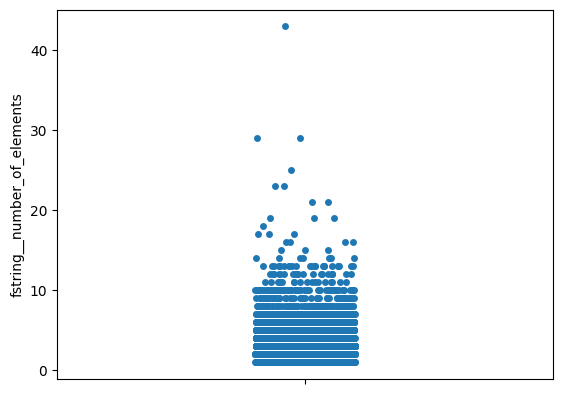

In [10]:
sns.stripplot(X['fstring__number_of_elements'])

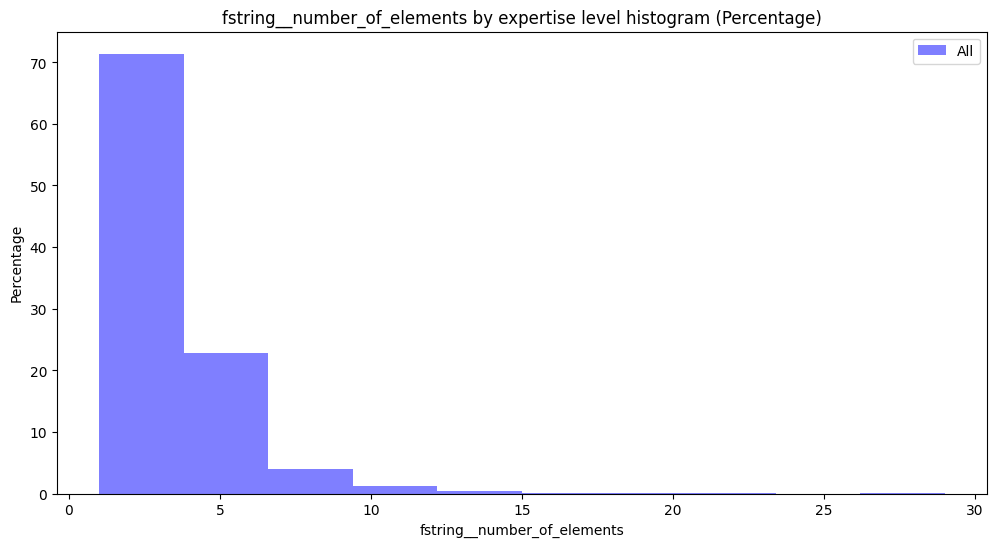

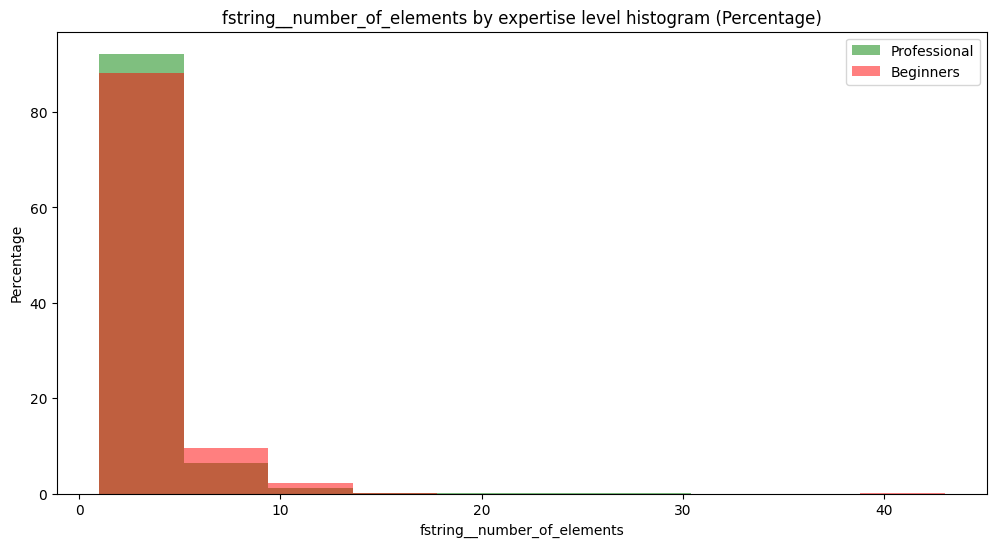

In [11]:
print_histogram(X, 'fstring__number_of_elements', 'fstring__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False, max_value=40)
print_histogram(X, 'fstring__number_of_elements', 'fstring__expertise_level', bins=10, include_all=False)

In [12]:
print_outliers_for_df_column(X, 'fstring__number_of_elements')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8465116109166826
Rango valores atípicos extremos (Tukey): [-4.0,10.0]
Rango valores atípicos leves (Tukey): [-1.0,7.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.844976467272759,92.64669340023511]
-3.0IQR: 0 instancias tienen un valor para fstring__number_of_elements inferior a -4.0 (Q1-3*IQR) para fstring__number_of_elements. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para fstring__number_of_elements inferior a -1.0 (Q1-1.5*IQR) para fstring__number_of_elements. Representando un 0.0% del total de instancias.
+1.5IQR: 314 instancias tienen un valor para fstring__number_of_elements superior a 7.0 (Q3+1.5*IQR) para fstring__number_of_elements. Representando un 3.396% del total de instancias.
+3.0IQR: 94 instancias tienen un valor para fstring__number_of_elements superior a 10.0 (Q3-3*IQR) para fstring__number_of_elements. Representando un 1.017% del total de instancias.
L: 740 i

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 10.0 (Con un MC de 84 usamos Tuckey Extremo)

In [13]:
X[X['fstring__number_of_elements'] > 10].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,fstring__number_of_elements,fstring__constants_pct,fstring__expressions_pct,fstring__expertise_level_BEGINNER,fstring__expertise_level_PROFESSIONAL
count,94.000000,94.000000,94.000000,94.000000,94.000000
mean,14.212766,0.503646,0.496354,0.404255,0.595745
std,4.724387,0.038821,0.038821,0.493379,0.493379
min,11.000000,0.333333,0.454545,0.000000,0.000000
25%,12.000000,0.500000,0.461538,0.000000,0.000000
50%,13.000000,0.500000,0.500000,0.000000,1.000000
75%,14.000000,0.538462,0.500000,1.000000,1.000000
max,43.000000,0.545455,0.666667,1.000000,1.000000


### Variable constants_pct (2/3)
Esta variable representa la proporción de los valores usados para parametrizar el JoinedStr que son constantes. Toma los valores de 0.0 - 1.0. La media es 0.558.

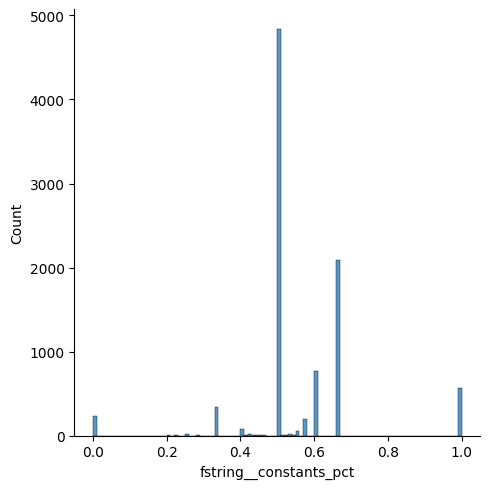

In [14]:
sns.displot(X['fstring__constants_pct'], bins=[i / 100 for i in range(0, 101)])

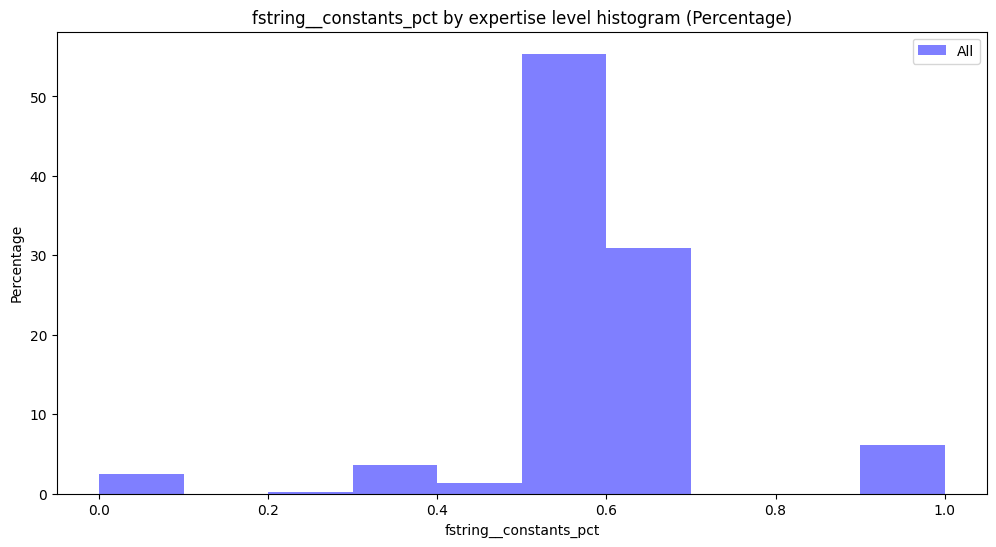

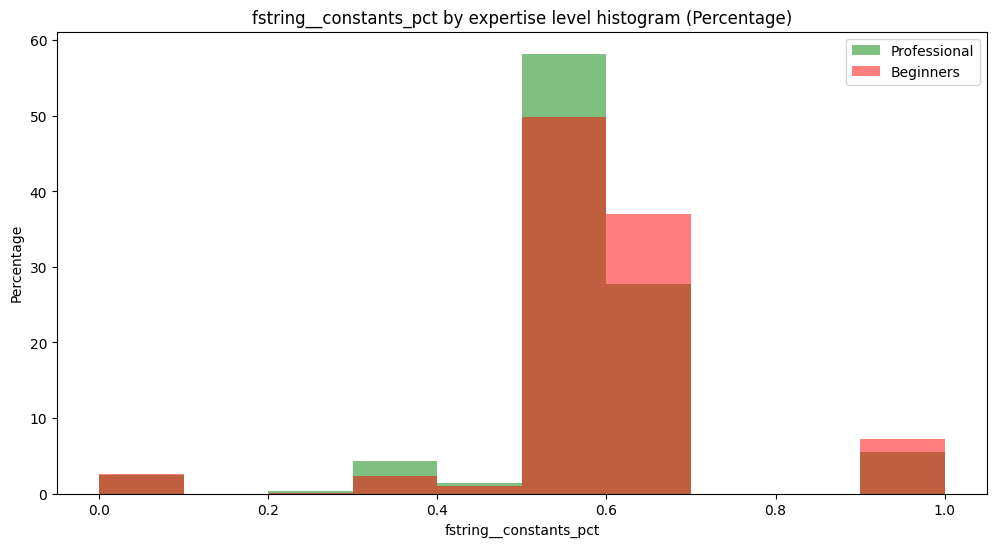

In [15]:
print_histogram(X, 'fstring__constants_pct', 'fstring__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False)
print_histogram(X, 'fstring__constants_pct', 'fstring__expertise_level', bins=10, include_all=False)

In [16]:
print_outliers_for_df_column(X, 'fstring__constants_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.38803758671955696
Rango valores atípicos extremos (Tukey): [-5.960464477539063e-08,1.1666667461395264]
Rango valores atípicos leves (Tukey): [0.2499999701976776,0.916666716337204]
Rango valores atípicos extremos (Fixed BoxPlot): [0.4357147967937095,1.8470699218752151]
-3.0IQR: 0 instancias tienen un valor para fstring__constants_pct inferior a -5.960464477539063e-08 (Q1-3*IQR) para fstring__constants_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 232 instancias tienen un valor para fstring__constants_pct inferior a 0.2499999701976776 (Q1-1.5*IQR) para fstring__constants_pct. Representando un 2.509% del total de instancias.
+1.5IQR: 565 instancias tienen un valor para fstring__constants_pct superior a 0.916666716337204 (Q3+1.5*IQR) para fstring__constants_pct. Representando un 6.111% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para fstring__constants_pct superior a 1.1666667461395264 (Q3-3*IQR) 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es menor de 0.25 o mayor que 0.917 (Con un MC de 39 usamos Tuckey)

In [26]:
X[(X['fstring__constants_pct'] < 0.25) | (X['fstring__constants_pct'] > 0.917)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,fstring__number_of_elements,fstring__constants_pct,fstring__expressions_pct,fstring__expertise_level_BEGINNER,fstring__expertise_level_PROFESSIONAL
count,797.000000,797.000000,797.000000,797.000000,797.000000
mean,1.145546,0.709438,0.290562,0.382685,0.617315
std,0.658456,0.453846,0.453846,0.486348,0.486348
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,1.000000,1.000000,1.000000,1.000000


### Variable expressions_pct (3/3)
Esta variable representa la proporción de valores usados para parametrizar el JoinedStr que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.44.

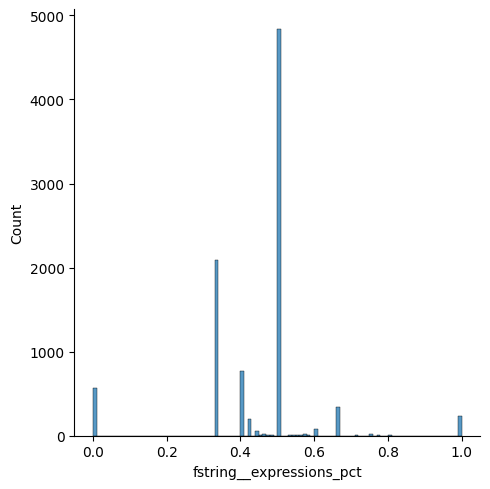

In [18]:
sns.displot(X['fstring__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

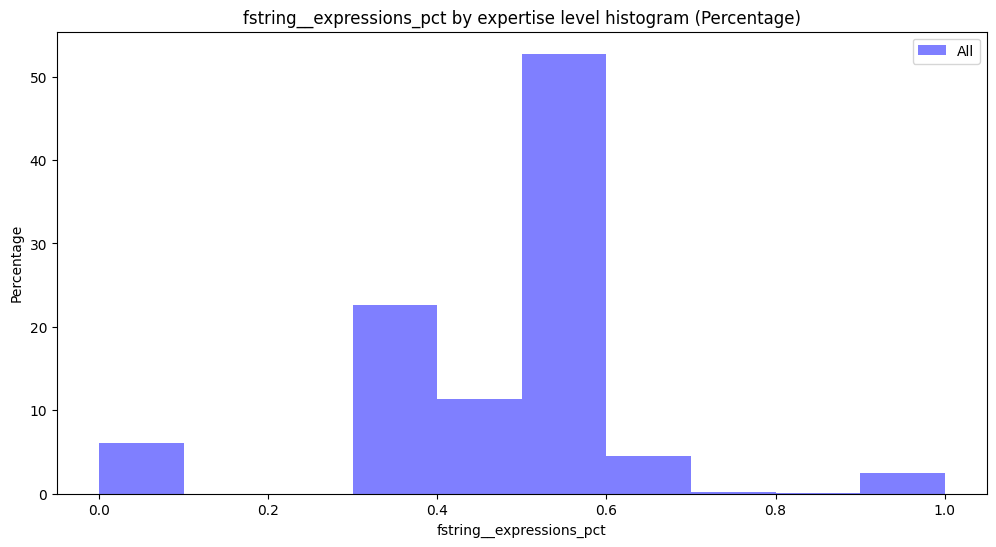

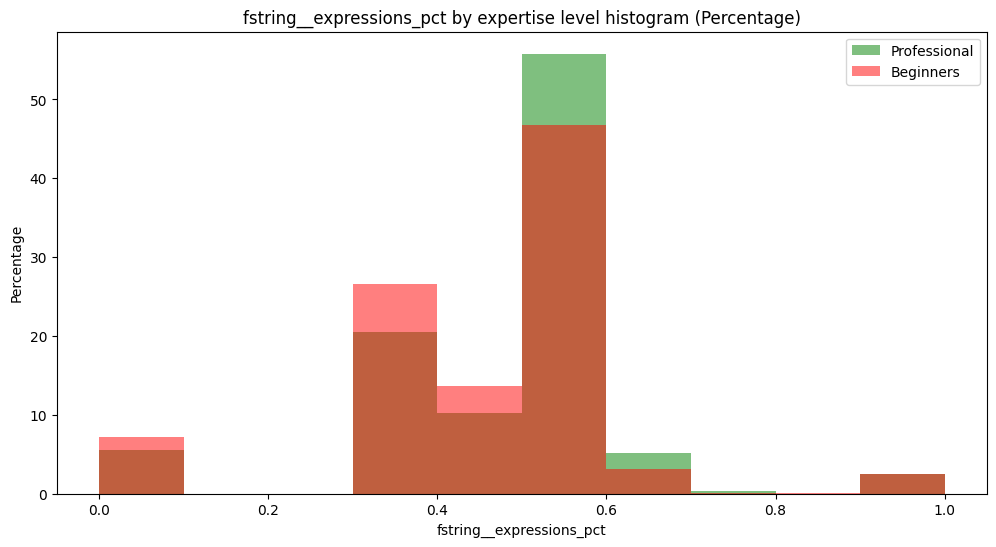

In [19]:
print_histogram(X, 'fstring__expressions_pct', 'fstring__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False)
print_histogram(X, 'fstring__expressions_pct', 'fstring__expertise_level', bins=10, include_all=False)

In [20]:
print_outliers_for_df_column(X, 'fstring__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.02910470962524414
Rango valores atípicos extremos (Tukey): [-0.16666662693023682,0.9999999701976776]
Rango valores atípicos leves (Tukey): [0.08333335816860199,0.7499999850988388]
Rango valores atípicos extremos (Fixed BoxPlot): [0.10754582450211234,0.7808665643980117]
-3.0IQR: 0 instancias tienen un valor para fstring__expressions_pct inferior a -0.16666662693023682 (Q1-3*IQR) para fstring__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 565 instancias tienen un valor para fstring__expressions_pct inferior a 0.08333335816860199 (Q1-1.5*IQR) para fstring__expressions_pct. Representando un 6.111% del total de instancias.
+1.5IQR: 250 instancias tienen un valor para fstring__expressions_pct superior a 0.7499999850988388 (Q3+1.5*IQR) para fstring__expressions_pct. Representando un 2.704% del total de instancias.
+3.0IQR: 230 instancias tienen un valor para fstring__expressions_pct superior a 0.99999997019

Describimos los valores de las variables de la tabla, cuando el valor de la variable es menor de 0.083 o mayor que 0.75

In [28]:
X[(X['fstring__expressions_pct'] < 0.083) | (X['fstring__expressions_pct'] > 0.749)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,fstring__number_of_elements,fstring__constants_pct,fstring__expressions_pct,fstring__expertise_level_BEGINNER,fstring__expertise_level_PROFESSIONAL
count,815.000000,815.000000,815.000000,815.000000,815.000000
mean,1.208589,0.699291,0.300709,0.375460,0.624540
std,0.774708,0.453857,0.453857,0.484539,0.484539
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,1.000000,1.000000,1.000000,1.000000


## Multivariate

Isolation forest algorithm

In [22]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,fstring__number_of_elements,fstring__constants_pct,fstring__expressions_pct,fstring__expertise_level
329,7,0.0,1.0,PROFESSIONAL
337,7,0.0,1.0,PROFESSIONAL
345,7,0.0,1.0,PROFESSIONAL
353,7,0.0,1.0,PROFESSIONAL


In [23]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
fstring__number_of_elements,4.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0
fstring__constants_pct,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fstring__expressions_pct,4.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
fstring__expertise_level_BEGINNER,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fstring__expertise_level_PROFESSIONAL,4.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [24]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
fstring__number_of_elements,9241.0,3.205173,2.032927,1.0,2.000000,3.0,4.000000,43.0
fstring__constants_pct,9241.0,0.558451,0.162720,0.0,0.500000,0.5,0.666667,1.0
fstring__expressions_pct,9241.0,0.441549,0.162720,0.0,0.333333,0.5,0.500000,1.0
fstring__expertise_level_BEGINNER,9241.0,0.337409,0.472851,0.0,0.000000,0.0,1.000000,1.0
fstring__expertise_level_PROFESSIONAL,9241.0,0.662591,0.472851,0.0,0.000000,1.0,1.000000,1.0
